In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns


In [4]:
L = pd.read_csv('loans_schema.csv')

In [37]:
L.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [5]:
L = L.drop(L[L['annual_income'] < 2500].index)

In [4]:
L.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [40]:
L.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9166 non-null   object 
 1   emp_length                        9182 non-null   float64
 2   state                             9976 non-null   object 
 3   homeownership                     9976 non-null   object 
 4   annual_income                     9976 non-null   float64
 5   verified_income                   9976 non-null   object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1471 non-null   float64
 8   verification_income_joint         1433 non-null   object 
 9   debt_to_income_joint              1471 non-null   float64
 10  delinq_2y                         9976 non-null   int64  
 11  months_since_last_delinq          4331 non-null   float64
 12  earlie

We have a variety of data types in these columns right from integers, floating numbers to objects

In [41]:
L.isnull() 

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


the null values in the "annual_income_joint" and "verification_income_joint" column have null values as NaN. Those are not missing values. These columns showcase whether people have opted for joint income scheme or not. 

In [42]:
L.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 9976, dtype: bool

There are no duplicates in our dataset

In [43]:
L.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [44]:
L.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
emp_length,9182.0,5.930625,3.703809,0.00,2.0000,6.000,10.0000,1.000000e+01
annual_income,9976.0,79412.738885,64695.239538,3000.00,45000.0000,65000.000,95000.0000,2.300000e+06
debt_to_income,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
annual_income_joint,1471.0,128085.155683,70007.200056,19200.00,87000.0000,114000.000,152000.0000,1.100000e+06
debt_to_income_joint,1471.0,20.018110,8.044744,0.32,14.2350,19.760,25.4800,3.998000e+01
delinq_2y,9976.0,0.216018,0.684045,0.00,0.0000,0.000,0.0000,1.300000e+01
months_since_last_delinq,4331.0,36.771415,21.642410,1.00,19.0000,34.000,53.0000,1.180000e+02
earliest_credit_line,9976.0,2001.282578,7.797631,1963.00,1997.0000,2003.000,2006.0000,2.015000e+03
inquiries_last_12m,9976.0,1.957698,2.380332,0.00,0.0000,1.000,3.0000,2.900000e+01
total_credit_lines,9976.0,22.696171,11.890225,2.00,14.0000,21.000,29.0000,8.700000e+01


This tells us the mean annual income of people is 79412usd whereas the median of annual income is usd65000. This maybe because the lowest and highest income values drive this value change. This shows a wide range in income levels, with some outliers having incomes as high as usd2.3 million.

In our dataset of almost 10000 entries only 1471 have opted for joint income schemes.

For joint applicants, the average annual income is usd128,085, higher than individual borrowers. This suggests that joint applications generally come from higher-income households.

The average debt-to-income ratio for joint applicants is 20.02%, close to the overall average, suggesting similar financial behavior as individual applicants.

The average employment length is approximately 5.93 years, with a standard deviation of 3.7 years. This indicates that most borrowers have been employed for about 6 years, though employment lengths vary significantly.

The average debt-to-income ratio is 19.31percent, but the maximum value is as high as 469percent. This high variability suggests some borrowers may be heavily indebted relative to their income.

On average, borrowers have 0.216 delinquencies in the last 2 years, meaning most applicants have little to no delinquencies, though the max goes up to 13.

For borrowers who have been delinquent, the average time since their last delinquency is about 36.77 months (roughly 3 years), with some as recent as 1 month ago and others as far back as 11.8 years.

The average earliest credit line is from the year 2001, with some going back as far as 1963. This indicates that many borrowers have long credit histories, which can be a positive sign for lenders.

he average number of credit inquiries in the last 12 months is 1.96, with some borrowers having up to 29 inquiries. A high number of inquiries could signal credit-seeking behavior.

On average, borrowers have utilized usd51,093 of their total available credit, which is about 28percent of the total average credit limit (usd183,749). This suggests that borrowers are utilizing a moderate portion of their credit.

Borrowers have an average of 2.67 installment accounts, with some having as many as 35. Installment loans could include mortgages, car loans, or personal loans.

The average loan amount is approximately usd16,357, with most loans falling between usd8,000 and usd24,000. The maximum loan amount is usd40,000.

The average interest rate on loans is 12.42percent, with a standard deviation of 5percent. Some loans have interest rates as high as 31%, indicating a wide variance in borrowing costs.

The average total paid (including interest and principal) is about usd2,494, with borrowers having paid an average of usd1,894 in principal and usd599 in interest. Some borrowers have paid up to usd41,630 in total, indicating loans with longer repayment periods or higher balances.

In [45]:
L['homeownership'].value_counts()  

MORTGAGE    4778
RENT        3848
OWN         1350
Name: homeownership, dtype: int64

<AxesSubplot:xlabel='homeownership', ylabel='count'>

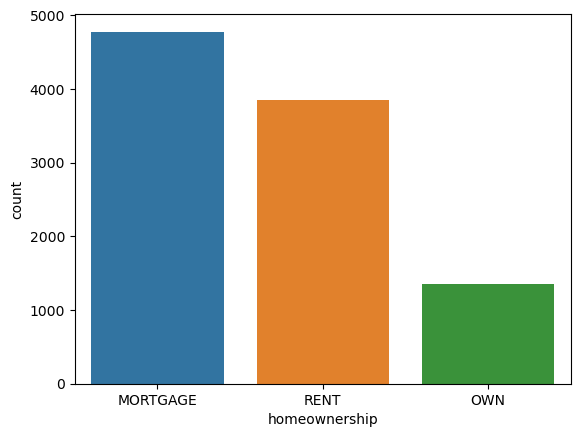

In [15]:
sns.countplot(x='homeownership', data=L)

In [46]:
L['loan_status'].value_counts() 

Current               9354
Fully Paid             445
In Grace Period         66
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

In [48]:
L[(L['homeownership']== "MORTGAGE") & (L['annual_income']<65000)]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
14,NaN,NaN,FL,MORTGAGE,17000.0,Verified,33.98,NaN,NaN,NaN,...,D3,Jan-2018,Current,whole,Cash,2744.21,454.36,255.79,198.57,0.0
15,dental hygienist,10.0,TN,MORTGAGE,60000.0,Not Verified,38.46,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,19172.64,2023.74,827.36,1196.38,0.0
16,NaN,NaN,NV,MORTGAGE,60000.0,Not Verified,31.22,NaN,NaN,NaN,...,D3,Jan-2018,Current,whole,Cash,11374.52,1532.08,625.48,906.60,0.0
20,maintenance adm assistant,10.0,KY,MORTGAGE,50000.0,Not Verified,15.60,NaN,NaN,NaN,...,A2,Jan-2018,Current,fractional,Cash,6102.23,1063.69,897.77,165.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,tire technician,10.0,FL,MORTGAGE,25000.0,Not Verified,46.86,70598.0,Not Verified,23.95,...,C5,Jan-2018,Current,fractional,Cash,6215.74,1251.91,784.26,467.65,0.0
9981,project manager,7.0,KY,MORTGAGE,64000.0,Not Verified,36.49,194000.0,Not Verified,23.72,...,B2,Jan-2018,In Grace Period,whole,Cash,27089.00,3892.94,2911.00,981.94,0.0
9984,sous chef,7.0,CT,MORTGAGE,49000.0,Source Verified,36.20,99000.0,Source Verified,28.29,...,D5,Jan-2018,In Grace Period,whole,Cash,29990.90,3333.60,1209.10,2124.50,0.0
9987,credit analyst,6.0,TX,MORTGAGE,55000.0,Source Verified,22.19,100000.0,Not Verified,30.77,...,B1,Mar-2018,Current,whole,Cash,15365.77,989.71,634.23,355.48,0.0


In [49]:
L[(L['homeownership']== "MORTGAGE") & (L['annual_income']<65000)]['loan_amount']

6       24000
14       3000
15      20000
16      12000
20       7000
        ...  
9974     7000
9981    30000
9984    31200
9987    16000
9993     5000
Name: loan_amount, Length: 1732, dtype: int64

In [50]:
L[(L['homeownership']== "RENT") & (L['annual_income']<65000)]['loan_amount']

1        5000
2        2000
3       21600
4       23000
9        6400
        ...  
9967    25000
9971     8000
9972     8975
9978     7000
9994     4800
Name: loan_amount, Length: 2250, dtype: int64

In [51]:
L[(L['homeownership']== "RENT") & (L['annual_income']>65000)]['loan_amount']

17      30000
24       8000
38       9500
41      15000
42      35000
        ...  
9973    20000
9980    15000
9992    23000
9995    24000
9999    12800
Name: loan_amount, Length: 1480, dtype: int64

In [52]:
L[(L['homeownership']== "MORTGAGE") & (L['annual_income']>65000)]['loan_amount']

0       28000
7       20000
10      25000
11      40000
12      16000
        ...  
9986    40000
9991    35000
9996    10000
9997    30000
9998    24000
Name: loan_amount, Length: 2888, dtype: int64

All these above combinations of home ownership type and annual income shows us how it affects the loan amount sanctioned.
People having their own house have higher amount sanctioned compared to mortgage follwed by rent.
And people having annual income greater than 65000usd have more loan amount than < 65000usd

In [53]:
L['loan_purpose'].head(30)

0                 moving
1     debt_consolidation
2                  other
3     debt_consolidation
4            credit_card
5                  other
6            credit_card
7     debt_consolidation
8       home_improvement
9            credit_card
10    debt_consolidation
11                 other
12    debt_consolidation
13           credit_card
14    debt_consolidation
15           credit_card
16           credit_card
17    debt_consolidation
18               medical
19    debt_consolidation
20           credit_card
21           credit_card
22    debt_consolidation
23      home_improvement
24           credit_card
25    debt_consolidation
26           credit_card
27    debt_consolidation
28    debt_consolidation
29                 house
Name: loan_purpose, dtype: object

This shows us the reason for people having taken loans. Mostly people have taken loans to get off with the debt consolidation.

<AxesSubplot:xlabel='homeownership'>

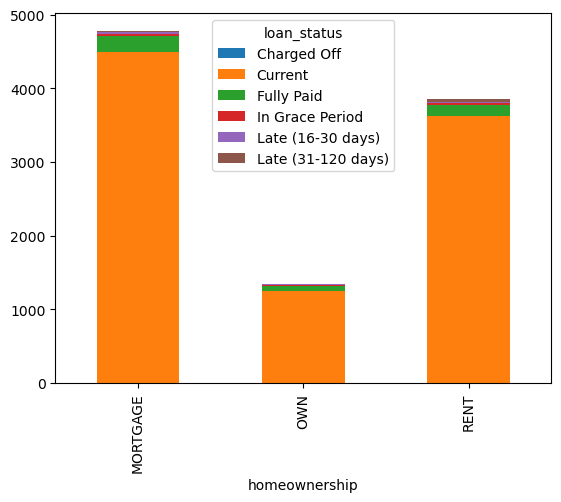

In [17]:
pd.crosstab(L['homeownership'], L['loan_status']).plot(kind='bar', stacked=True)

People are mostly having the loan status in current mode, other portion of people have fully paid their loan

In [54]:
L.sort_values(['annual_income','loan_amount','sub_grade']).head(20)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
3599,lab tech trainer,8.0,MO,RENT,3000.0,Not Verified,186.00,33000.0,Not Verified,16.91,...,B4,Feb-2018,Current,whole,Cash,4643.25,484.41,356.75,127.66,0.0
2847,NaN,NaN,AL,OWN,3000.0,Verified,64.40,90000.0,Verified,17.53,...,A5,Jan-2018,In Grace Period,whole,Cash,6479.70,707.93,520.30,157.63,30.0
7034,cleaner,2.0,HI,RENT,3120.0,Not Verified,215.38,69120.0,Not Verified,9.72,...,B4,Jan-2018,Current,whole,Cash,15836.56,2931.28,2163.44,767.84,0.0
516,receptionist,3.0,SC,MORTGAGE,3300.0,Not Verified,469.09,283300.0,Not Verified,9.79,...,B5,Feb-2018,Current,whole,Cash,22643.18,3287.65,2356.82,930.83,0.0
2185,after school day care,2.0,CT,MORTGAGE,4000.0,Source Verified,437.61,104000.0,NaN,22.48,...,B3,Jan-2018,Current,whole,DirectPay,20570.56,2347.26,1429.44,917.82,0.0
8414,NaN,NaN,CA,OWN,4800.0,Verified,8.75,62800.0,Verified,39.71,...,C3,Jan-2018,Current,whole,Cash,26340.78,3219.60,1659.22,1560.38,0.0
7231,NaN,NaN,MI,MORTGAGE,5000.0,Not Verified,267.55,85000.0,Not Verified,29.93,...,B5,Mar-2018,Current,whole,Cash,5719.95,390.47,280.05,110.42,0.0
6799,owner,4.0,WI,MORTGAGE,5000.0,Not Verified,216.83,122200.0,Not Verified,16.67,...,B3,Feb-2018,Current,whole,Cash,30361.44,4323.78,3238.56,1085.22,0.0
2759,NaN,NaN,PA,OWN,5208.0,Verified,96.77,40800.0,Verified,27.47,...,B1,Mar-2018,Current,whole,Cash,6660.67,444.35,339.33,105.02,0.0
2875,federal work-study,4.0,CO,MORTGAGE,5235.0,Source Verified,19.50,NaN,NaN,NaN,...,B4,Feb-2018,Current,whole,Cash,2094.52,990.50,905.48,85.02,0.0


In [55]:
L.groupby(['sub_grade','homeownership']).mean().head(30)

emp_length  annual_income  debt_to_income  \
sub_grade homeownership                                              
A1        MORTGAGE         6.741525  110374.697211       14.575378   
          OWN              6.088889  113295.165490       13.283137   
          RENT             5.000000   94193.966667       14.349333   
A2        MORTGAGE         6.789256   98400.477625       17.854023   
          OWN              7.431034   86741.521127       16.150000   
          RENT             4.762590   70284.217687       15.361769   
A3        MORTGAGE         6.876596  100289.151606       17.365060   
          OWN              6.791045   72553.920000       14.659333   
          RENT             4.766467   75817.642458       14.776704   
A4        MORTGAGE         6.681481   99973.701160       18.278020   
          OWN              6.528571   72935.273412       17.350471   
          RENT             5.298343   72734.350370       16.148730   
A5        MORTGAGE         6.338095   93704.719298       19.477544   
          OWN              6.000000   77389.480769       18.048154   
          RENT             4.779661   65614.268421       15.791684   
B1        MORTGAGE         6.923547   97666.829104       16.724335   
          OWN              7.207792   76987.956522       17.720000   
          RENT             5.286432   71543.625000       15.205288   
B2        MORTGAGE         6.893891   92125.897009       19.150302   
          OWN              5.852941   70276.862195       18.487195   
          RENT             5.118227   67583.902533       16.719422   
B3        MORTGAGE         6.613821   90908.540667       22.636314   
          OWN              6.980769   71907.540984       17.685574   
          RENT             4.610837   67978.364189       16.788874   
B4        MORTGAGE         6.827451   90934.050335       19.234424   
          OWN              6.067568   71339.373908       19.075172   
          RENT             4.775610   65931.512812       19.706875   
B5        MORTGAGE         6.788104   90186.305405       23.248615   
          OWN              6.065789   63633.242198       17.541209   
          RENT             4.723684   68593.139918       17.343169   

                         annual_income_joint  debt_to_income_joint  delinq_2y  \
sub_grade homeownership                                                         
A1        MORTGAGE             169261.944444             13.750000   0.075697   
          OWN                  266708.470000             14.210000   0.039216   
          RENT                 148843.142857             13.834286   0.158333   
A2        MORTGAGE             170505.545455             16.246136   0.068966   
          OWN                  213025.283636             14.044545   0.070423   
          RENT                 136580.000000             12.825000   0.054422   
A3        MORTGAGE             128729.125000             17.056667   0.104418   
          OWN                  126288.125000             14.968750   0.053333   
          RENT                 116400.727273             17.931818   0.050279   
A4        MORTGAGE             162061.629836             16.734098   0.122867   
          OWN                  107701.400000             22.327000   0.164706   
          RENT                 137170.000000             16.725625   0.089947   
A5        MORTGAGE             127046.081081             19.262432   0.254386   
          OWN                   80832.000000             15.475714   0.153846   
          RENT                  91160.000000             15.141429   0.105263   
B1        MORTGAGE             150866.569231             17.346769   0.187861   
          OWN                  114012.352941             19.921765   0.152174   
          RENT                 110839.823529             16.074118   0.168269   
B2        MORTGAGE             143097.031746             18.663968   0.256798   
          OWN                  122028.759286             17.755714   0.256098   
  

Here we can see the mean values for each of the columns in the dataset. It has been arranged with respect to loan subgrade level and then by home ownership. We can compare the debt to income ratio, employment length, the loan amount , interest rate amongst different subgrades.

A1 is the best subgrade (safest loan).
A5 is still good but riskier within the "A" grade.
The pattern continues, with G5 being the riskiest.
Each grade (A to G) has 5 levels (1 to 5), with 1 being the least risky and 5 being the most risky within that grade.

In [57]:
L['sub_grade'].value_counts()  

B1    646
B2    638
B5    630
C1    596
B4    580
C2    571
A4    567
B3    538
A3    503
C3    501
C4    501
A5    483
C5    480
A2    479
A1    422
D2    320
D1    317
D3    310
D5    262
D4    229
E5     91
E4     73
E3     72
E2     57
E1     41
F1     30
G1     11
F3      9
F2      9
F4      5
F5      4
G4      1
Name: sub_grade, dtype: int64

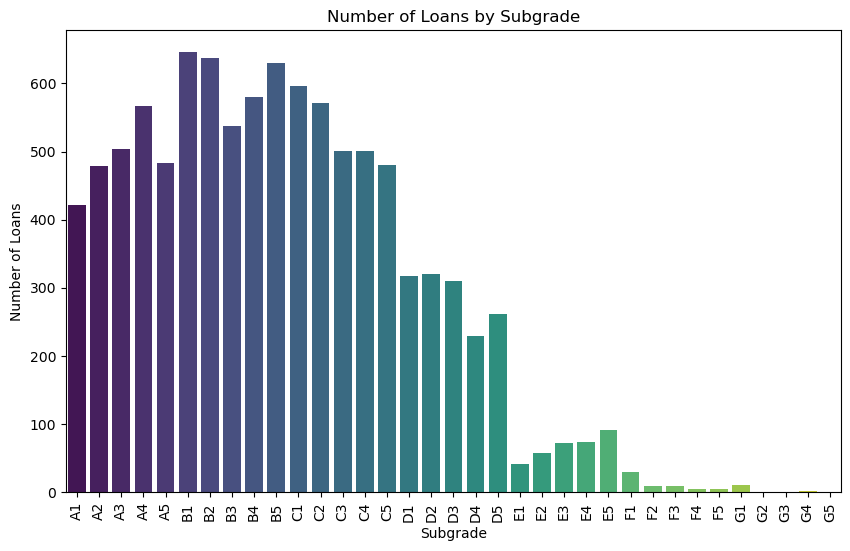

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

subgrade_counts = L['sub_grade'].value_counts()

subgrade_order = ['A1', 'A2', 'A3', 'A4', 'A5',
                  'B1', 'B2', 'B3', 'B4', 'B5',
                  'C1', 'C2', 'C3', 'C4', 'C5',
                  'D1', 'D2', 'D3', 'D4', 'D5',
                  'E1', 'E2', 'E3', 'E4', 'E5',
                  'F1', 'F2', 'F3', 'F4', 'F5',
                  'G1', 'G2', 'G3', 'G4', 'G5']

subgrade_counts = subgrade_counts.reindex(subgrade_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Number of Loans by Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('Number of Loans')
plt.show()


This tells us that most customers have been graded between the range A1 upto C5. Because A range is the safest grade level.
And there are very little number of people who's loan application were graded as risky from grade E to G.

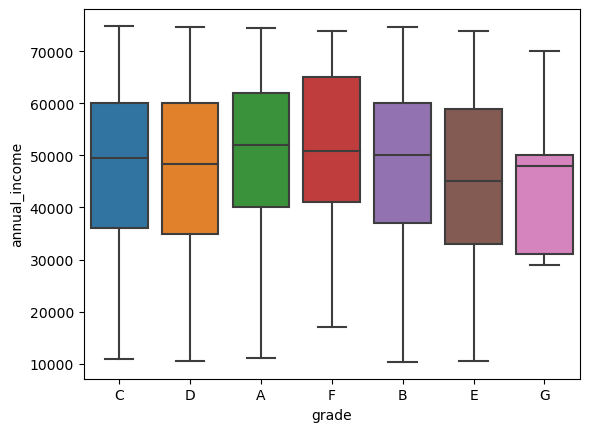

In [61]:
sns.boxplot(x='grade', y='annual_income', data=a)
a = L[(L['annual_income']> 10000) & (L['annual_income']<75000)]

This plot tells us how people of various annual incomes have been graded from A to G depending on their income status.

In [64]:
L.sort_values('annual_income')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
3599,lab tech trainer,8.0,MO,RENT,3000.0,Not Verified,186.00,33000.0,Not Verified,16.91,...,B4,Feb-2018,Current,whole,Cash,4643.25,484.410000,356.75,127.66,0.0
2847,NaN,NaN,AL,OWN,3000.0,Verified,64.40,90000.0,Verified,17.53,...,A5,Jan-2018,In Grace Period,whole,Cash,6479.70,707.930000,520.30,157.63,30.0
7034,cleaner,2.0,HI,RENT,3120.0,Not Verified,215.38,69120.0,Not Verified,9.72,...,B4,Jan-2018,Current,whole,Cash,15836.56,2931.280000,2163.44,767.84,0.0
516,receptionist,3.0,SC,MORTGAGE,3300.0,Not Verified,469.09,283300.0,Not Verified,9.79,...,B5,Feb-2018,Current,whole,Cash,22643.18,3287.650000,2356.82,930.83,0.0
2185,after school day care,2.0,CT,MORTGAGE,4000.0,Source Verified,437.61,104000.0,NaN,22.48,...,B3,Jan-2018,Current,whole,DirectPay,20570.56,2347.260000,1429.44,917.82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,bookkeeper,10.0,NY,MORTGAGE,1020000.0,Source Verified,1.75,NaN,NaN,NaN,...,D1,Mar-2018,Current,whole,Cash,19357.88,1467.540000,642.12,825.42,0.0
4235,partner,10.0,WA,MORTGAGE,1050000.0,Verified,7.54,NaN,NaN,NaN,...,A3,Feb-2018,Current,whole,DirectPay,35943.71,4890.010000,4056.29,833.72,0.0
9868,managing director,10.0,NY,RENT,1200000.0,Verified,4.26,NaN,NaN,NaN,...,A1,Mar-2018,Current,whole,Cash,18970.31,1198.520000,1029.69,168.83,0.0
3923,senior system engineer,0.0,MD,MORTGAGE,1600001.0,Source Verified,0.98,NaN,NaN,NaN,...,A4,Feb-2018,Current,whole,Cash,11097.50,1112.310000,902.50,209.81,0.0


<AxesSubplot:xlabel='loan_amount', ylabel='loan_purpose'>

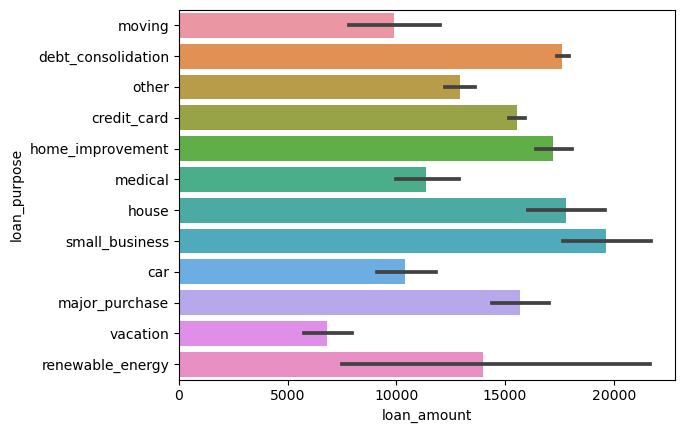

In [9]:
sns.barplot(y='loan_purpose', x='loan_amount', data=L)

From here we can find out whether the loan purpose have relation with how much loan amount should be granted. The black line shows us about the outliers. Most people have taken loan for opening a small business and debt consolidation or buying a house
Very little people have taken loans for vacation.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'moving'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'other'),
  Text(3, 0, 'credit_card'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'medical'),
  Text(6, 0, 'house'),
  Text(7, 0, 'small_business'),
  Text(8, 0, 'car'),
  Text(9, 0, 'major_purchase'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'renewable_energy')])

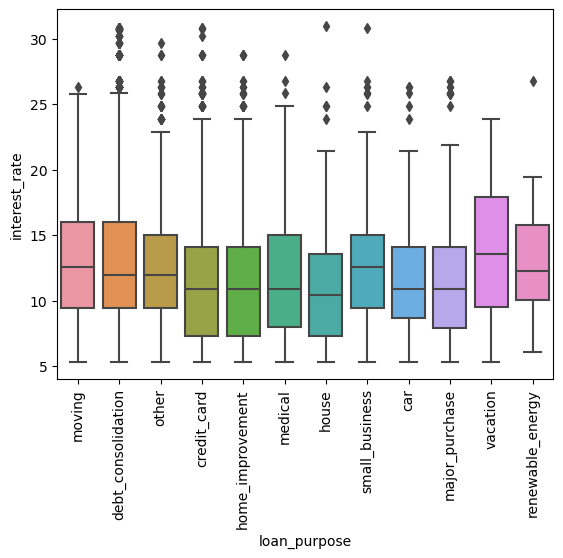

In [12]:
import matplotlib.pyplot as plt
sns.boxplot(x='loan_purpose', y='interest_rate', data=L)
plt.xticks(rotation=90)  

This shows us loan purpose verses interest rate. If loan was taken for vacation then it has gotten higher interest rate. For home improvement and credit card have lesser interest rate

<AxesSubplot:xlabel='loan_amount', ylabel='delinq_2y'>

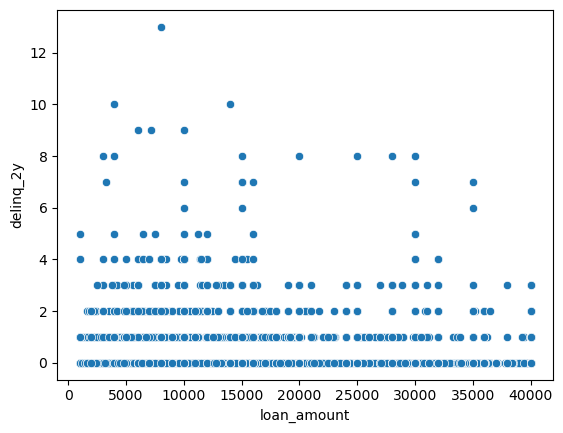

In [13]:
sns.scatterplot(x='loan_amount', y='delinq_2y', data=L)


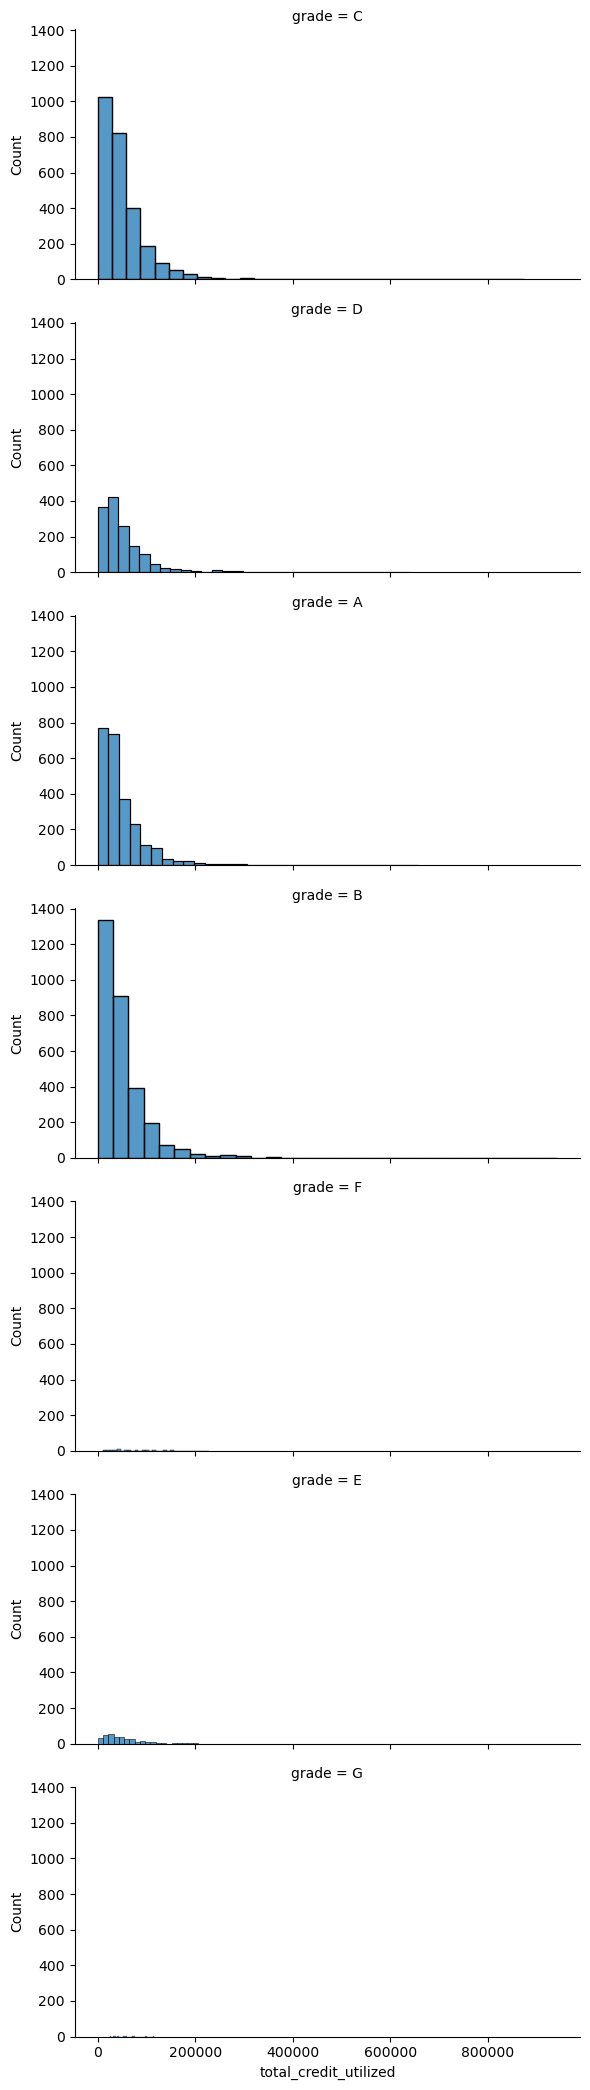

In [36]:
g = sns.FacetGrid(L, row='grade', height=3, aspect=2)
g.map(sns.histplot, 'total_credit_utilized', bins=30)  
g.set_titles(col_template="{col_name}")
plt.show()



The graph shows how total_credit_utilized that is the total amount of credit that borrowers have used varies across different loan grades. Each row of the grid represents one loan grade from A to G

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'moving'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'other'),
  Text(3, 0, 'credit_card'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'medical'),
  Text(6, 0, 'house'),
  Text(7, 0, 'small_business'),
  Text(8, 0, 'car'),
  Text(9, 0, 'major_purchase'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'renewable_energy')])

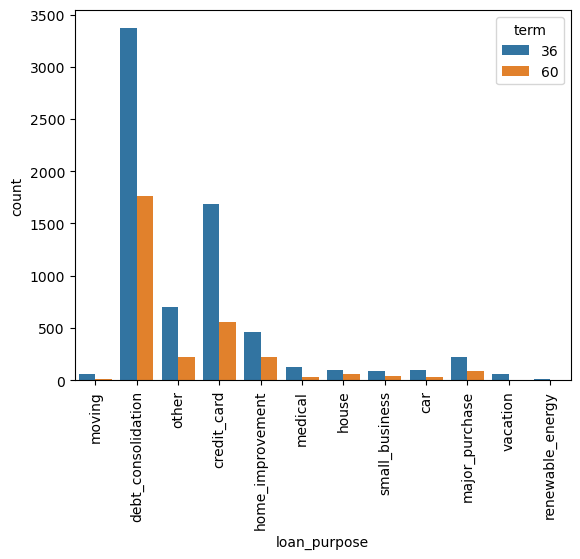

In [18]:
sns.countplot(x='loan_purpose', hue='term', data=L)
plt.xticks(rotation=90)

This graph shows which loan purpose required how many years of loan term. Debt consolidation mostly required 36 month term. 

<AxesSubplot:xlabel='application_type', ylabel='loan_amount'>

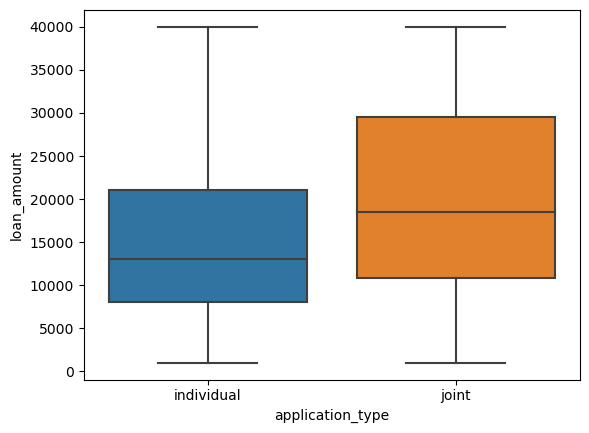

In [19]:
sns.boxplot(x='application_type', y='loan_amount', data=L)


In [18]:
Comparison between individual loan applications verses joint application

SyntaxError: invalid syntax (3303581706.py, line 1)

<AxesSubplot:xlabel='issue_month'>

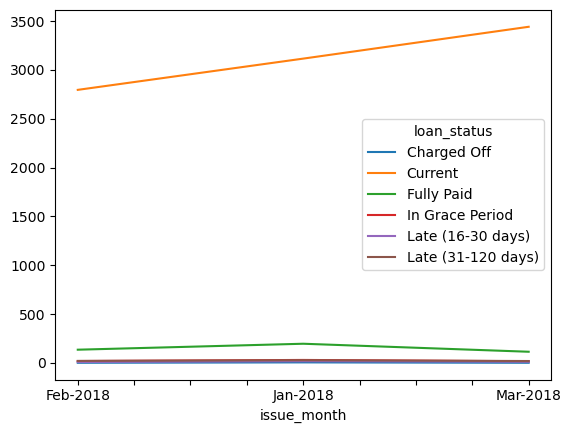

In [20]:
loan_status_by_month = L.groupby('issue_month')['loan_status'].value_counts().unstack().fillna(0)
loan_status_by_month.plot(kind='line')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Current'),
  Text(1, 0, 'Fully Paid'),
  Text(2, 0, 'In Grace Period'),
  Text(3, 0, 'Late (31-120 days)'),
  Text(4, 0, 'Charged Off'),
  Text(5, 0, 'Late (16-30 days)')])

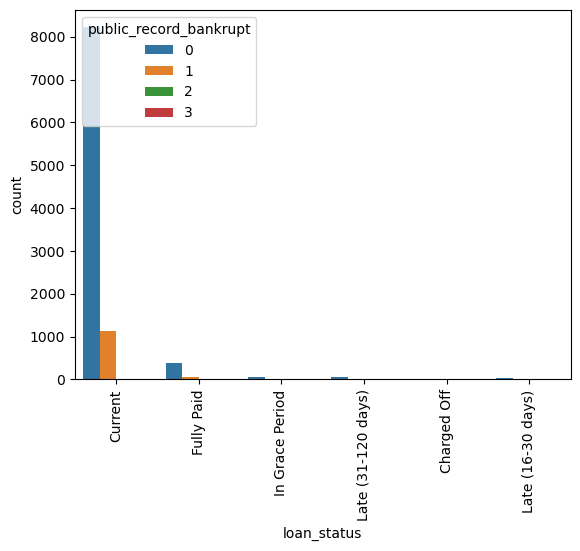

In [22]:
sns.countplot(x='loan_status', hue='public_record_bankrupt', data=L)
plt.xticks(rotation=90)

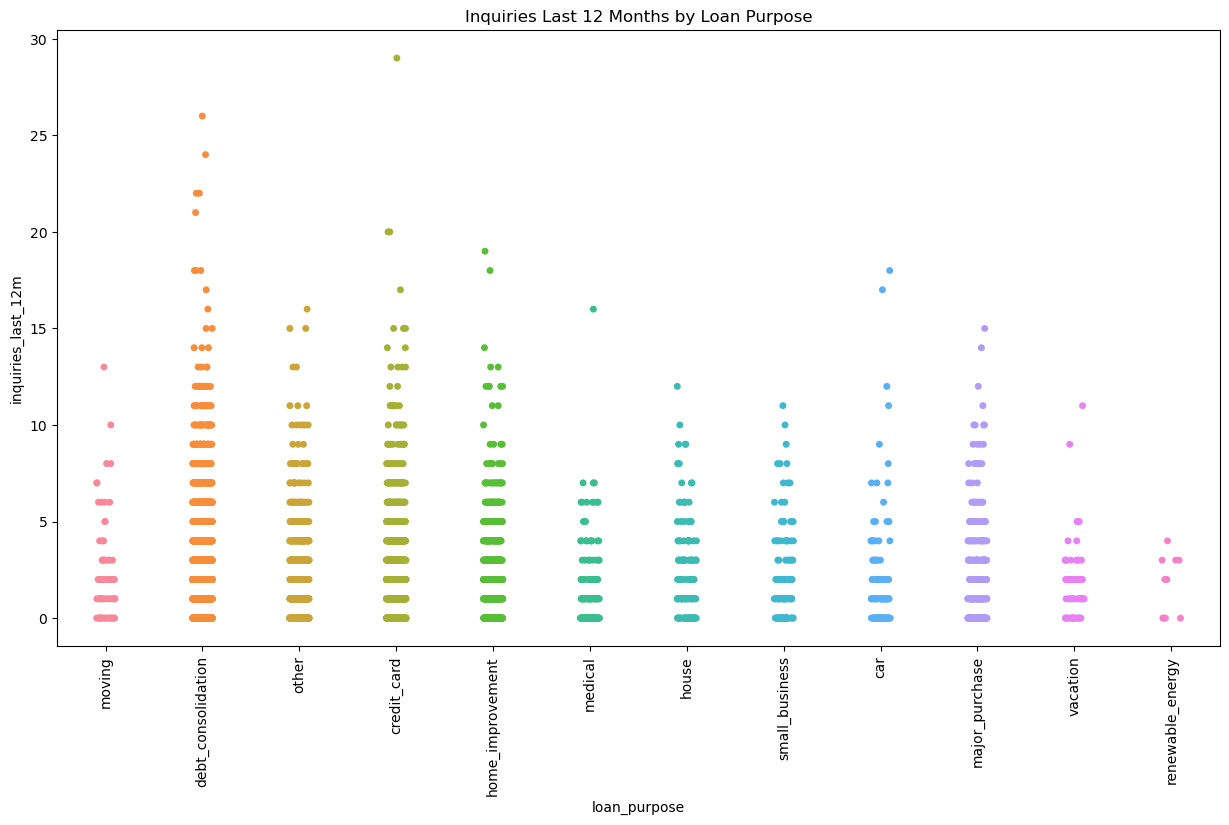

In [34]:
plt.figure(figsize=(15, 8))
sns.stripplot(x='loan_purpose', y='inquiries_last_12m', data=L, jitter=True)
plt.xticks(rotation=90)
plt.title('Inquiries Last 12 Months by Loan Purpose')
plt.show()


This dhows us the demand for loan is high and low for which of the purposes

In [16]:
L['state'].value_counts()  

CA    1328
TX     801
NY     792
FL     732
IL     380
NJ     338
OH     338
GA     334
NC     298
PA     298
VA     261
AZ     253
MD     247
MI     244
MA     236
CO     235
WA     234
CT     181
IN     177
TN     166
MN     159
NV     158
MO     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      88
OK      80
MS      71
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      36
HI      35
AK      33
ME      26
DE      24
MT      24
VT      23
SD      20
WY      19
DC      19
ND      14
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

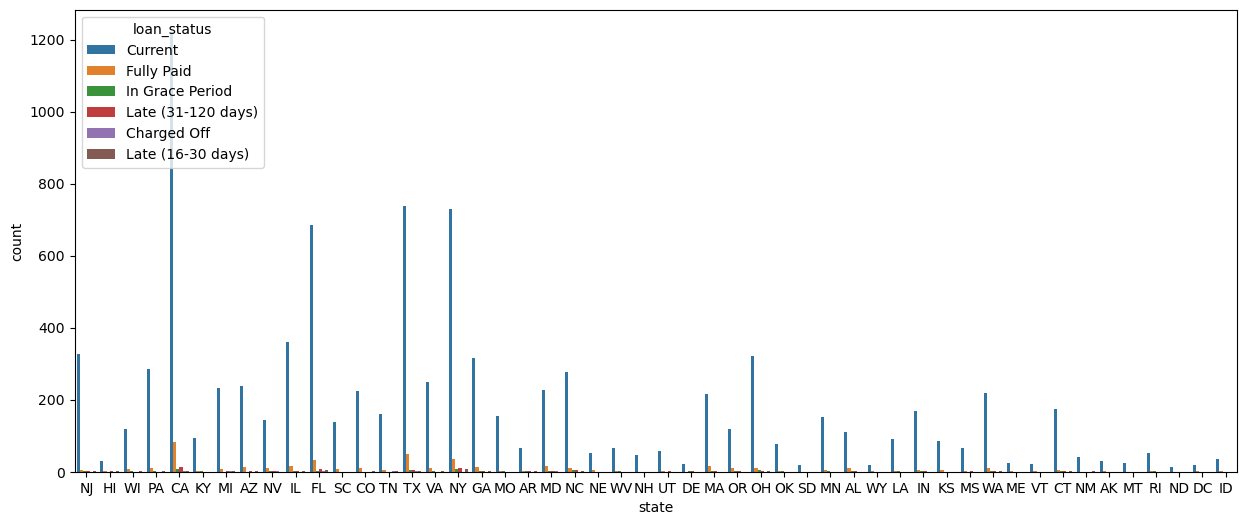

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x='state', hue='loan_status', data=L)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

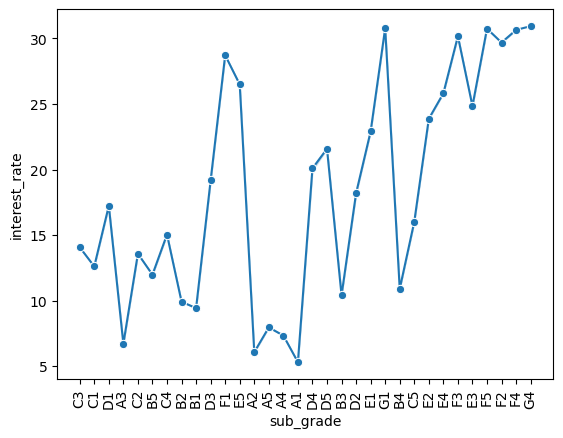

In [29]:
sns.lineplot(x='sub_grade', y='interest_rate', data=L, marker='o')
plt.xticks(rotation=90)

As we can see A1, A2 ,A3 have been assigned lower interest rates making them the safest loan for the bank. F5 ,G1,G5 being the most riskiest loan because it has the highest interest rates. 

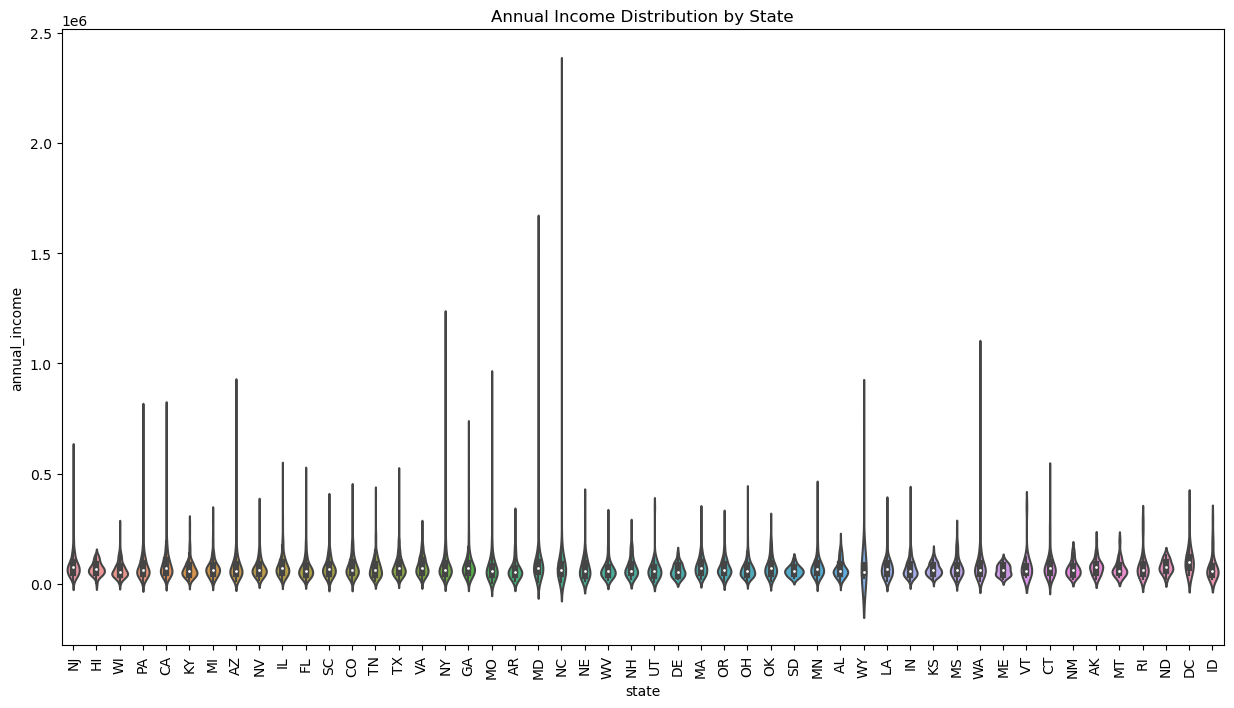

In [31]:
plt.figure(figsize=(15, 8))  # Increase width and height
sns.violinplot(x='state', y='annual_income', data=L)
plt.xticks(rotation=90)  # Rotate labels if needed
plt.title('Annual Income Distribution by State')
plt.show()


This is a fun graph which compares the annual income accross all the states HI being one of the lowest and NC being the highest.

TypeError: text() missing 1 required positional argument: 's'

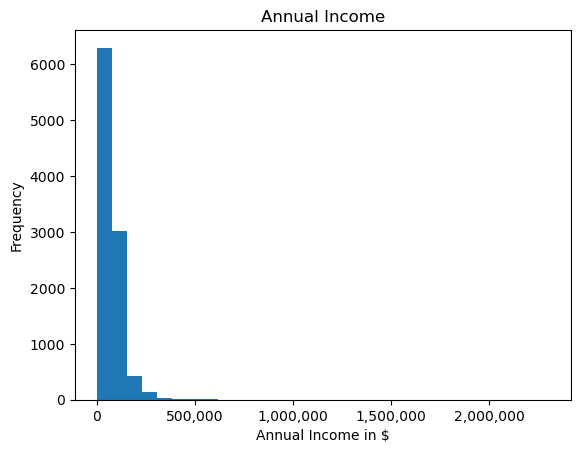

In [6]:
plt.hist(L['annual_income'], bins=30)
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')

plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Annual Income')
plt.xlabel('Annual Income in $')
plt.ylabel('Frequency');
plt.text(2500000,750)
plt.text(2500000,500)
plt.text(2500000,250)
plt.text(2500000,0);

Here we have a graph that is using the pure data from the dataset, and as we can see, we can not really tell too much.
We notice that there must be some outliers in the the dataset due to the x-axis extending so long, which lets us know that there is some cleaning to be done.

TypeError: text() missing 1 required positional argument: 's'

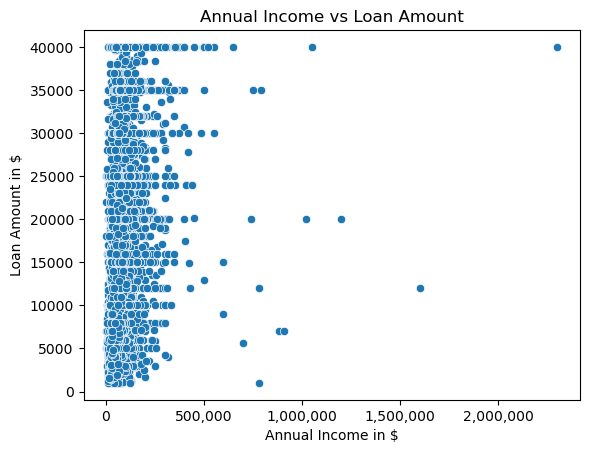

In [8]:
sns.scatterplot(data=L,x='annual_income', y='loan_amount')
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income in $')
plt.ylabel('Loan Amount in $');
plt.text(2500000,4600 )
plt.text(2500000,3050)
plt.text(2500000,1500)
plt.text(2500000,50);

Here we can see again that the outliers in the income are making the graph difficult to read, but we can sligtly infer that alot of loan amounts sit around the \$10000-$30000 range. Since the model is so squished though, it would make more sense to model a smaller range of annual income in order to get a clearer result.

TypeError: text() missing 1 required positional argument: 's'

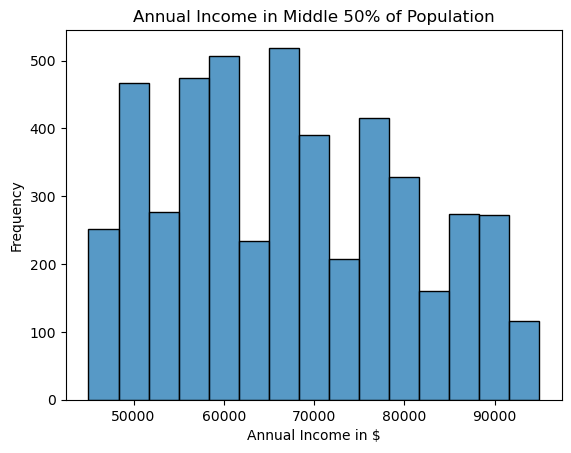

In [10]:
middle_50 = L[(L['annual_income'] > 45000) & (L['annual_income'] < 95000)]
sns.histplot(data=middle_50, x='annual_income', bins=15)
plt.title('Annual Income in Middle 50% of Population')
plt.xlabel('Annual Income in $')
plt.ylabel('Frequency');
plt.text(100000,60)
plt.text(100000,35)
plt.text(100000,10);

Looking at the distribution of the middle 50% of annual income, we get a much clearer view as to just how much people who get accepted for loan realisticaly make. Bringing it down to the middle 50% has also brought the range down from 2 million down to about 50000.

TypeError: text() missing 1 required positional argument: 's'

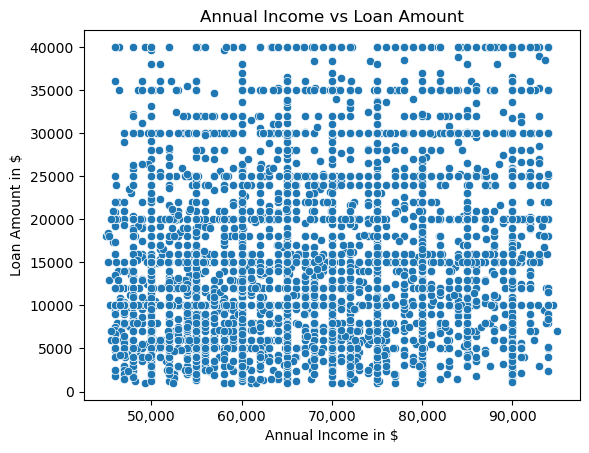

In [12]:
sns.scatterplot(data=middle_50,x='annual_income', y='loan_amount')
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income in $')
plt.ylabel('Loan Amount in $');
plt.text(100000,4600 )
plt.text(100000,3050)
plt.text(100000,1500)
plt.text(100000,50);


Using the middle 50% for this scatterplot too we can see a heavier denisty of points in the lower left hand side of the graph. From this we can infer that generally individuals with lower incomes tend to apply and receive more loans, which of course makes sense intuitively.

In [13]:
corr=np.corrcoef(middle_50['annual_income'], middle_50['loan_amount'])
print("The correlation between annual income and loan amount granted is",corr[1,0],"which is very low, but is postive meaning there is a weak correlation bewteen the two.")

The correlation between annual income and loan amount granted is 0.19755919811545072 which is very low, but is postive meaning there is a weak correlation bewteen the two.


TypeError: text() missing 1 required positional argument: 's'

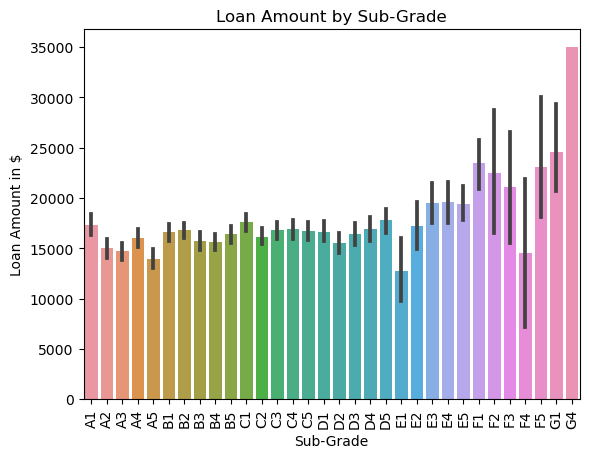

In [14]:
L['SortKey'] = L['sub_grade'].apply(lambda x: (x[0], int(x[1:])))
loans_sorted = L.sort_values(by='SortKey')
sns.barplot(data=loans_sorted,y='loan_amount', x='sub_grade')
plt.xticks(rotation=90);
plt.title('Loan Amount by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Loan Amount in $');
plt.text(33,4600 )
plt.text(33,3050)
plt.text(33,1500)
plt.text(33,50);


Comparing the loan amount granted against the sub-grade we can clearly see that generally as a loan gets larger, it becomes riskier for the bank, so they gove it a lower grade. Also as loans get riskier, we can see the black bar get larger indicating a higher variation in loan amount granted, which could be due to a higher frequency of those grades.